In [1]:
"""Beginner Tutorials from TensorFlow website"""

import tensorflow as tf
print(tf.__version__)

2022-01-19 16:30:09.144442: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


2.4.1


In [2]:
# Tutorial #1

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

In [3]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (28, 28)),
                                    tf.keras.layers.Dense(128, activation="relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10)
                                   ])


2022-01-19 16:30:10.239677: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-01-19 16:30:10.240256: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-01-19 16:30:10.290450: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-19 16:30:10.290652: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.605GHz coreCount: 14 deviceMemorySize: 3.81GiB deviceMemoryBandwidth: 178.84GiB/s
2022-01-19 16:30:10.290664: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-01-19 16:30:10.291573: I tensorflow/stream_executor/platform/de

In [4]:
predictions = model(x_train[:1]).numpy()
predictions

2022-01-19 16:30:10.689905: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


array([[ 0.03922083,  0.07668848,  0.09544726, -0.11526752, -0.3572039 ,
         0.16952571,  0.12901658, -0.11220501, -0.3260625 ,  0.00510973]],
      dtype=float32)

In [5]:
tf.nn.softmax(predictions)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.10662501, 0.11069579, 0.1127919 , 0.09136201, 0.07172888,
        0.12146462, 0.11664252, 0.09164224, 0.07399776, 0.10304925]],
      dtype=float32)>

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()

2.1081324

In [7]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5)

2022-01-19 16:30:10.913406: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.
2022-01-19 16:30:10.994832: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-19 16:30:11.018300: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 3600000000 Hz


Epoch 1/5
1875/1875 [==============================] - 2s 759us/step - loss: 0.4879 - accuracy: 0.8546
Epoch 2/5
1875/1875 [==============================] - 1s 740us/step - loss: 0.1508 - accuracy: 0.9556
Epoch 3/5
1875/1875 [==============================] - 1s 758us/step - loss: 0.1072 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 1s 729us/step - loss: 0.0881 - accuracy: 0.9734
Epoch 5/5
1875/1875 [==============================] - 1s 720us/step - loss: 0.0700 - accuracy: 0.9774


In [9]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0748 - accuracy: 0.9784


[0.07481381297111511, 0.9783999919891357]

In [10]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [11]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[4.84802314e-08, 5.60315683e-10, 2.51416714e-06, 6.52824456e-05,
        3.45623911e-11, 1.10505303e-08, 8.79574300e-13, 9.99931335e-01,
        5.19353698e-08, 7.69735379e-07],
       [9.56380219e-09, 8.64994654e-05, 9.99899030e-01, 1.43499265e-05,
        5.48116085e-19, 3.97781541e-09, 1.02765874e-07, 1.61813108e-15,
        4.11988275e-08, 3.17997683e-15],
       [3.44506134e-06, 9.97942746e-01, 6.76013646e-04, 1.06135652e-04,
        9.19927970e-06, 2.77451181e-06, 2.91406905e-05, 6.86737883e-04,
        5.43351576e-04, 4.90473553e-07],
       [9.99587715e-01, 4.00131173e-09, 4.78085785e-05, 2.24331060e-07,
        1.72989178e-06, 3.48567733e-06, 7.17534276e-05, 2.54937855e-04,
        9.02813042e-08, 3.23780987e-05],
       [3.02851788e-07, 2.25964136e-08, 4.03965305e-06, 1.81153545e-08,
        9.98850346e-01, 1.65241573e-07, 7.00091459e-06, 5.40101282e-05,
        7.90258753e-07, 1.08341640e-03]], dtype=float32)>

In [12]:
# Tutorial #2\

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [13]:
print(train_images.shape)
print(len(train_labels))

(60000, 28, 28)
60000


In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
test_images.shape

(10000, 28, 28)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

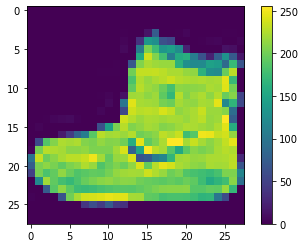

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

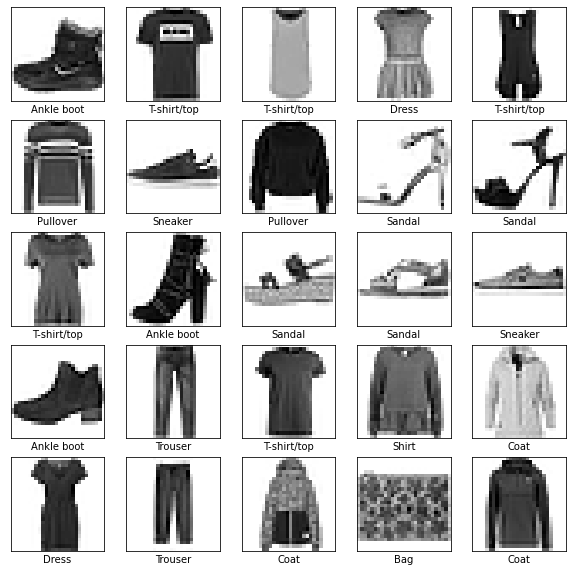

In [18]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.Dense(10)
])

In [20]:
model.compile(optimizer="adam",
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=["accuracy"]
              )

In [21]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 4:58 - loss: 2.6377 - accuracy: 0.0625

2022-01-19 16:30:20.138921: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 1s 709us/step - loss: 0.6380 - accuracy: 0.7832
Epoch 2/10
1875/1875 [==============================] - 1s 703us/step - loss: 0.4730 - accuracy: 0.8339
Epoch 3/10
1875/1875 [==============================] - 1s 723us/step - loss: 0.4451 - accuracy: 0.8456
Epoch 4/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.4284 - accuracy: 0.8489
Epoch 5/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.4205 - accuracy: 0.8526
Epoch 6/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.4149 - accuracy: 0.8549
Epoch 7/10
1875/1875 [==============================] - 1s 702us/step - loss: 0.4086 - accuracy: 0.8558
Epoch 8/10
1875/1875 [==============================] - 1s 712us/step - loss: 0.4027 - accuracy: 0.8600
Epoch 9/10
1875/1875 [==============================] - 1s 729us/step - loss: 0.4030 - accuracy: 0.8589
Epoch 10/10
1875/1875 [==============================] - 1s 714us/step - lo

In [22]:
# Tensors

rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


In [23]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


In [24]:
rank_2_tensor = tf.constant([[1,2], [3,4], [5,6]])
print(rank_2_tensor)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


In [25]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


In [26]:
np.array(rank_2_tensor)

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)

In [27]:
rank_2_tensor.numpy()

array([[1, 2],
       [3, 4],
       [5, 6]], dtype=int32)

In [28]:
a = tf.constant([[1,2], [3,4]])
b = tf.constant([[1,1], [1,1]])

In [29]:
print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [31]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [32]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
print(tf.reduce_max(c))
print(tf.argmax(c))
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


In [39]:
rank_4_tensor = tf.random.normal([3, 2, 4, 5])

In [40]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In [43]:
rank_4_tensor[0,0,:,:]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[ 0.36289313,  1.3852986 ,  1.291503  ,  0.09470778, -0.50857115],
       [-1.2181394 , -1.4941777 ,  2.5760934 ,  0.12937777, -1.1591004 ],
       [ 1.3654587 ,  0.3765755 , -0.636005  ,  1.184234  ,  1.635159  ],
       [-1.3300661 , -0.28124574, -0.5425117 ,  1.0590253 , -0.32875413]],
      dtype=float32)>

In [45]:
# Reshaping
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [51]:
reshape = tf.reshape(x, (-1, 3))

In [52]:
print(reshape.shape)

(1, 3)


In [ ]:
# Variables